In [31]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


In [32]:
data_train = os.path.join('../data/Garbage classification')
labels = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [43]:
#hyperparaters
validation_split = 0.2
batch_size = 10
image_size = (200,200)
epochs = 5
learning_rate = 1e-3

In [14]:
for label in labels:
    directory = os.path.join(data_train, label)
    print(f"Found {len(os.listdir(directory))} images of {label}")

Found 403 images of cardboard
Found 501 images of glass
Found 410 images of metal
Found 594 images of paper
Found 482 images of plastic
Found 137 images of trash


In [39]:
def plot_loss(history):
    plt.figure()
    plt.title(f'CNN Loss - batch size {batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(range(1, epochs+1), history.history['val_loss'])
    plt.plot(range(1, epochs+1), history.history['loss'])
    plt.legend(['Validation Loss', 'Training Loss'])

def plot_accuracy(history):
    plt.figure()
    plt.title(f'CNN Accuracy - batch size {batch_size}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(range(1, epochs+1), history.history['val_accuracy'])
    plt.plot(range(1, epochs+1), history.history['accuracy'])
    plt.legend(['Validation Accuracy', 'Training Accuracy'])

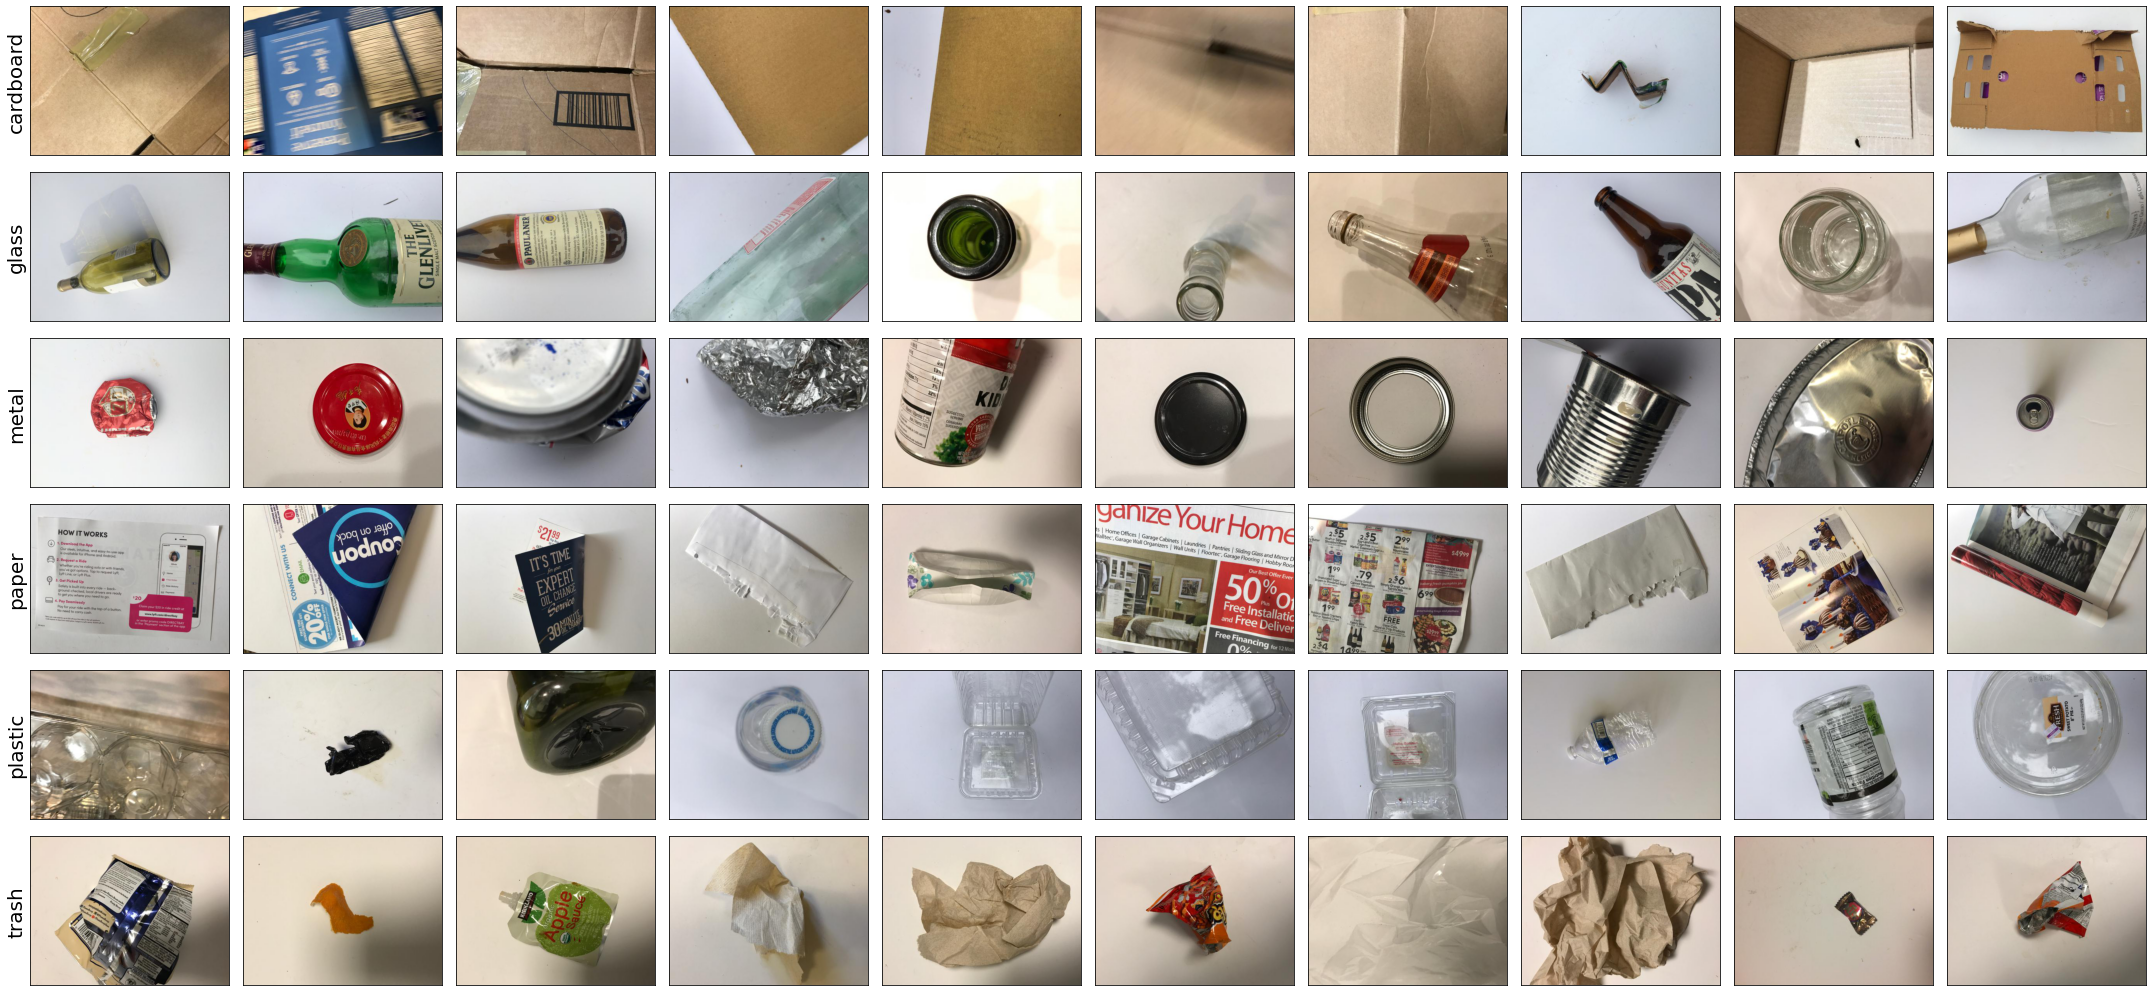

In [30]:
# Visualizing the data
def plot_images():
    plt.figure(figsize=(30,14))

    for i, label in enumerate(labels):
        directory = os.path.join(data_train, label)
        for j in range(10):
            path = os.path.join(directory, os.listdir(directory)[j])
            img = mpimg.imread(path)

            plt.subplot(6, 10, i*10 + j + 1)
            plt.imshow(img)

            if j == 0:
                plt.ylabel(labels[i], fontsize=20)

    plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
    plt.tight_layout()
    plt.show()

plot_images()

In [18]:
# Size of the image
directory = os.path.join(data_train, 'trash')
path = os.path.join(directory, os.listdir(directory)[0])
image = mpimg.imread(path)
image.shape

(384, 512, 3)

In [45]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='../data/train',
    validation_split=0.2,
    subset="training",
    label_mode="categorical",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    directory='../data/train',
    validation_split=0.2,
    subset="validation",
    label_mode="categorical",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
    shuffle=True
)

Found 1766 files belonging to 6 classes.
Using 1413 files for training.
Found 1766 files belonging to 6 classes.
Using 353 files for validation.


In [28]:
train_ds, val_ds

(<BatchDataset shapes: ((None, 150, 150, 3), (None, 6)), types: (tf.float32, tf.float32)>,
 <BatchDataset shapes: ((None, 150, 150, 3), (None, 6)), types: (tf.float32, tf.float32)>)

In [46]:
def make_cnn_model(input_shape, labels, num_dense_layers):
    
    model = keras.Sequential()
    
    model.add(layers.Conv2D(32, 3, padding="same", activation="relu", input_shape=input_shape))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, 3, padding="same", activation="relu"))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    
    for _ in range(num_dense_layers):
        model.add(layers.Dense(units=64, activation="relu"))
        
    model.add(layers.Dense(units=labels, activation="softmax"))
    
    return model 

In [47]:
model = make_cnn_model(input_shape=image_size + (3,), labels=len(labels), num_dense_layers=10)
model.build()
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 100, 100, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 100, 100, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 50, 50, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 160000)            0         
                                                                 
 dense_6 (Dense)             (None, 64)               

In [48]:
callbacks = [
    keras.callbacks.ModelCheckpoint("./model/cnn/save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate),
    loss="categorical_crossentropy",
    metrics=["accuracy"],
)
history = model.fit(
    train_ds, epochs=epochs, callbacks=callbacks, validation_data=val_ds)

Epoch 1/30
142/142 [==============================] - 5s 29ms/step - loss: 2.6730 - accuracy: 0.2243 - val_loss: 1.7455 - val_accuracy: 0.2351
Epoch 2/30
142/142 [==============================] - 4s 27ms/step - loss: 1.7428 - accuracy: 0.2173 - val_loss: 1.7289 - val_accuracy: 0.2380
Epoch 3/30
142/142 [==============================] - 4s 27ms/step - loss: 1.7453 - accuracy: 0.2385 - val_loss: 1.7192 - val_accuracy: 0.2436
Epoch 4/30
142/142 [==============================] - 4s 27ms/step - loss: 1.6634 - accuracy: 0.2795 - val_loss: 1.6608 - val_accuracy: 0.3116
Epoch 5/30
142/142 [==============================] - 4s 26ms/step - loss: 1.6190 - accuracy: 0.2979 - val_loss: 1.6888 - val_accuracy: 0.3059
Epoch 6/30
142/142 [==============================] - 4s 27ms/step - loss: 1.4723 - accuracy: 0.4183 - val_loss: 1.6771 - val_accuracy: 0.2635
Epoch 7/30
142/142 [==============================] - 4s 27ms/step - loss: 1.3297 - accuracy: 0.4827 - val_loss: 1.6443 - val_accuracy: 0.3456

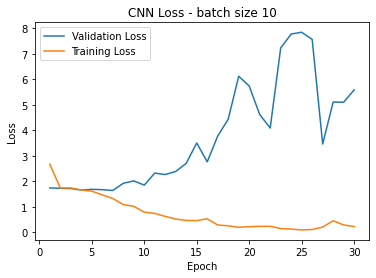

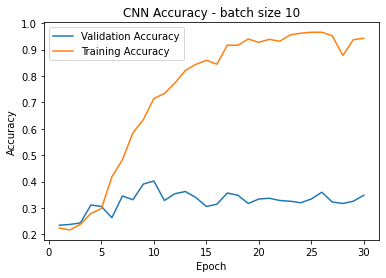

In [49]:
plot_loss(history)
plot_accuracy(history)

In [75]:
def predict(category):
    directory = os.path.join('../data/test', category)

    path = os.path.join(directory, os.listdir(directory)[10])
    img = mpimg.imread(path)
    x = tf.keras.preprocessing.image.smart_resize(
        img, (200,200), interpolation='bilinear'
    )

    x = np.expand_dims(x, axis=0)

    images = np.vstack([x])
    classes = model.predict(images)
    pred = labels[np.argmax(classes)]

    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])
    plt.title('Actual: {}      Pred: {}'.format(category, pred))

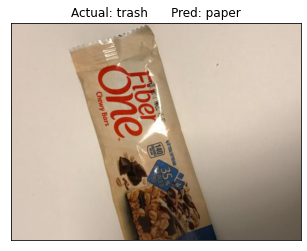

In [76]:
predict('trash')

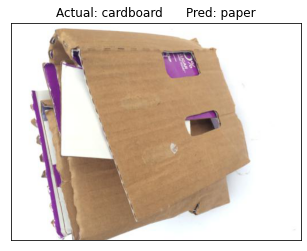

In [77]:
predict('cardboard')

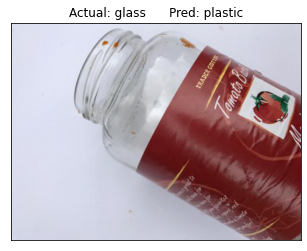

In [78]:
predict('glass')

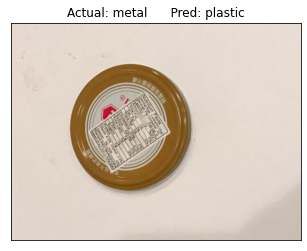

In [79]:
predict('metal')

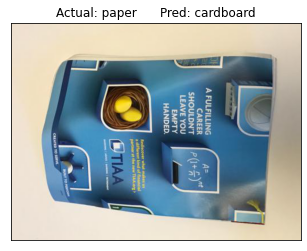

In [80]:
predict('paper')

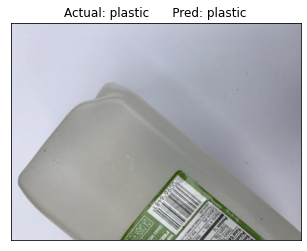

In [81]:
predict('plastic')